# Ploting Astronomical Coordinates

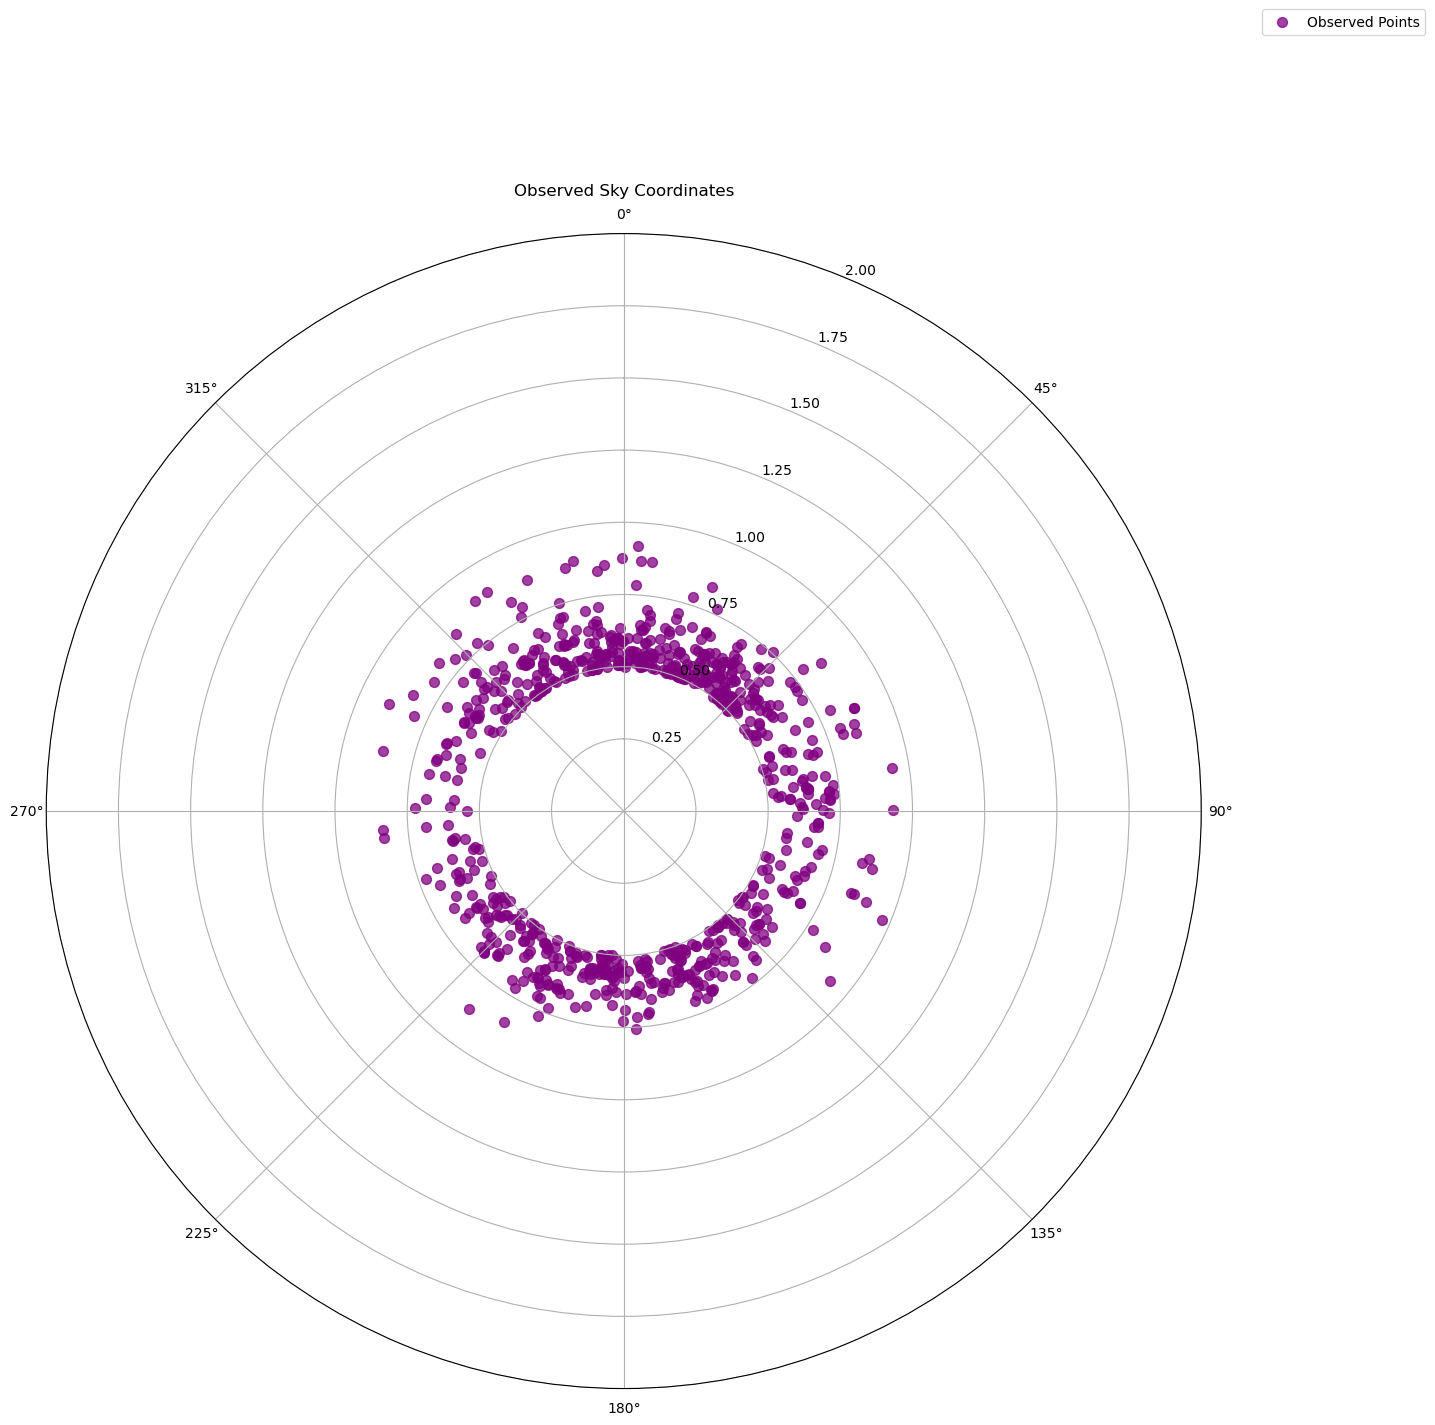

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# List of RA and Dec as strings
file_path = "/Users/j.alcaide/Library/Mobile Documents/com~apple~CloudDocs/ICE_FASE2JiC/coords4/SNIacoords_net.txt"
coordinates = [
    "19:38:30.190 -06:28:05.91",
    "10:35:50.310 -34:16:22.40",
    "01:20:56.771 +19:39:15.11",
    "22:44:13.387 -18:10:41.72",
    "01:23:55.560 -38:00:49.54",
    "21:54:08.277 -20:42:41.73",
    "14:43:07.380 -22:40:11.27",
    "15:59:21.128 -33:05:09.32",
    "00:56:49.963 +15:30:51.05",
    "01:01:33.559 -19:48:45.20"
]

def hms_to_radians(h, m, s):
    """Convert RA from hours, minutes, seconds to radians."""
    ra_hours = h + m / 60 + s / 3600
    return ra_hours * 15 * np.pi / 180  # Convert hours to degrees, then to radians

def dms_to_decimal(d, m, s):
    """Convert Dec from degrees, arcminutes, arcseconds to decimal degrees."""
    sign = -1 if d < 0 else 1
    return sign * (abs(d) + m / 60 + s / 3600)

# Arrays to store the converted values
theta = []  # RA in radians (azimuthal angle)
r = []      # Dec normalized to [0, 2] (radial distance)

# Convert each coordinate
with open(file_path) as f:
    content = f.readlines()
    for line in content:
        ra_str, dec_str = line.split()
        # Parse RA (h, m, s) and Dec (d, m, s)
        h, m, s = map(float, ra_str.split(":"))
        d, m, s = map(float, dec_str.replace("+", "").replace("-", " -").split(":"))  # Handle +/- sign
        dec_sign = -1 if "-" in dec_str else 1
        d *= dec_sign

        # Convert RA and Dec
        theta.append(hms_to_radians(h, m, s))
        dec_deg = dms_to_decimal(d, m, s)
        r.append((dec_deg + 90) / 180)  # Normalize Dec to [0, 2]

# Create the polar plot
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(15,15))
ax.scatter(theta, r, c='purple', s=50, alpha=0.75, label='Observed Points')

# Customizing the plot
ax.set_theta_zero_location("N")  # Set 0° (North) at the top
ax.set_theta_direction(-1)  # Angles increase clockwise
ax.set_rmax(2.0)  # Set max radius for both hemispheres
ax.grid(True)
ax.set_title("Observed Sky Coordinates", va='bottom')
ax.legend(loc="upper right", bbox_to_anchor=(1.2, 1.2))

# Show the plot
plt.show()
fig.savefig('polar_graph.png', dpi=600)

# Planning Fixed Observation Tiles for CAPIBARA

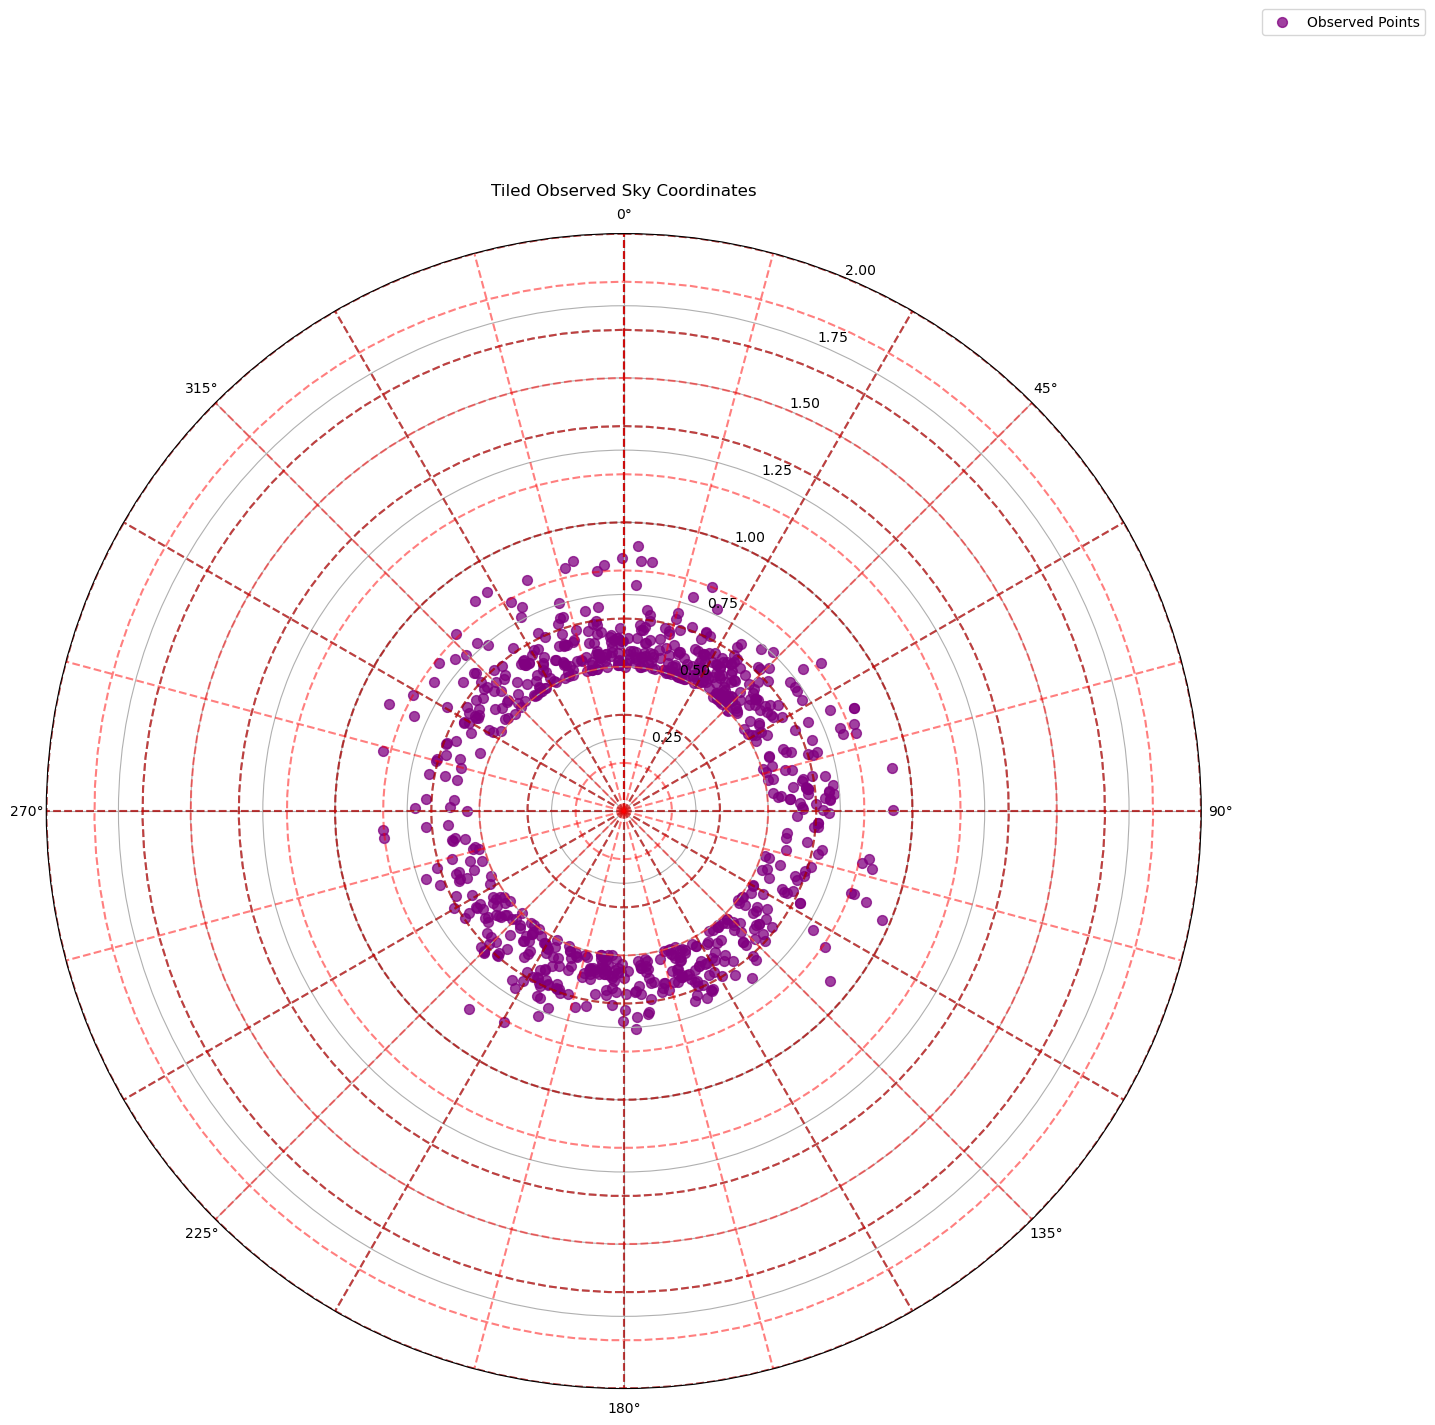

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# Define the number of radial and azimuthal divisions for the circular and square tiles
n_radial = 6  # Number of radial divisions
n_azimuthal = 12  # Number of azimuthal divisions for circular tiles
n_latitude = 12  # Number of latitude bands for square tiles
n_longitude = 24  # Number of longitude divisions for square tiles

# Masking regions (e.g., near the Milky Way, Sun, Moon)
# Define these regions using RA and Dec ranges (example values below)
exclusion_regions = [
    {"RA_min": 17, "RA_max": 19, "Dec_min": -10, "Dec_max": 10},  # Near Milky Way
    {"RA_min": 12, "RA_max": 13, "Dec_min": -10, "Dec_max": 10},  # Near Sun (example)
    {"RA_min": 20, "RA_max": 21, "Dec_min": 0, "Dec_max": 10},  # Near Moon (example)
]

# Circular Tile Grid
def create_circular_tiles(ax):
    """Generate circular tiles over the polar plot."""
    for r in np.linspace(0, 2.0, n_radial + 1):
        ax.plot(np.linspace(0, 2 * np.pi, 100), [r] * 100, 'k--', alpha=0.5)  # Radial circles
    for theta in np.linspace(0, 2 * np.pi, n_azimuthal + 1):
        ax.plot([theta, theta], [0, 2.0], 'k--', alpha=0.5)  # Azimuthal lines

# Square Tile Grid
def create_square_tiles(ax):
    """Generate square tiles over the polar plot."""
    latitudes = np.linspace(-90, 90, n_latitude + 1)
    longitudes = np.linspace(0, 360, n_longitude + 1)
    for lat in latitudes:
        r = (lat + 90) / 180 * 2  # Normalize latitude to r
        ax.plot(np.linspace(0, 2 * np.pi, 100), [r] * 100, 'r--', alpha=0.5)
    for lon in longitudes:
        theta = lon * np.pi / 180  # Convert longitude to radians
        ax.plot([theta, theta], [0, 2.0], 'r--', alpha=0.5)

# Visualize Polar Plots with Tiles
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(15, 15))

# Plot observed points
ax.scatter(theta, r, c='purple', s=50, alpha=0.75, label='Observed Points')

# Add tile grids
create_circular_tiles(ax)
create_square_tiles(ax)

# Customize the plot
ax.set_theta_zero_location("N")  # Set 0° (North) at the top
ax.set_theta_direction(-1)  # Angles increase clockwise
ax.set_rmax(2.0)  # Set max radius for both hemispheres
ax.grid(True)
ax.set_title("Tiled Observed Sky Coordinates", va='bottom')
ax.legend(loc="upper right", bbox_to_anchor=(1.2, 1.2))

# Show the plot
plt.show()
fig.savefig('tiled_polar_graph.png', dpi=600)

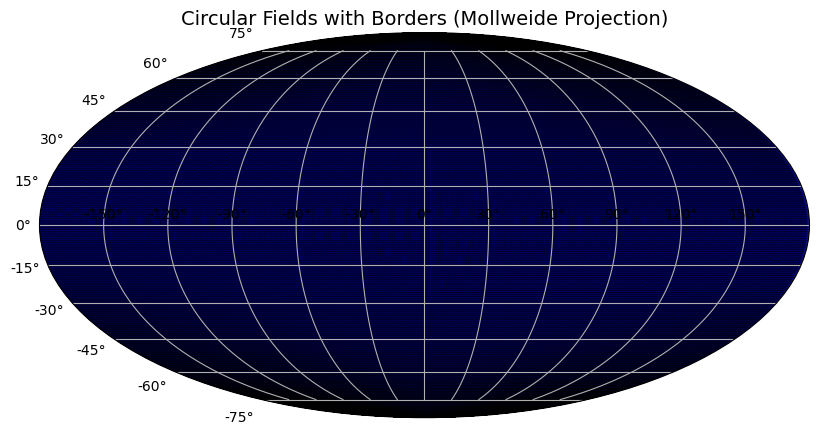

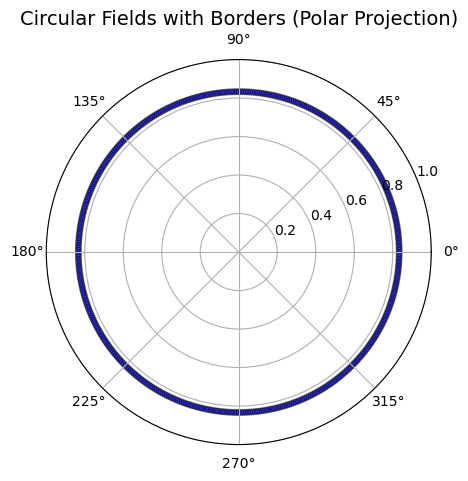

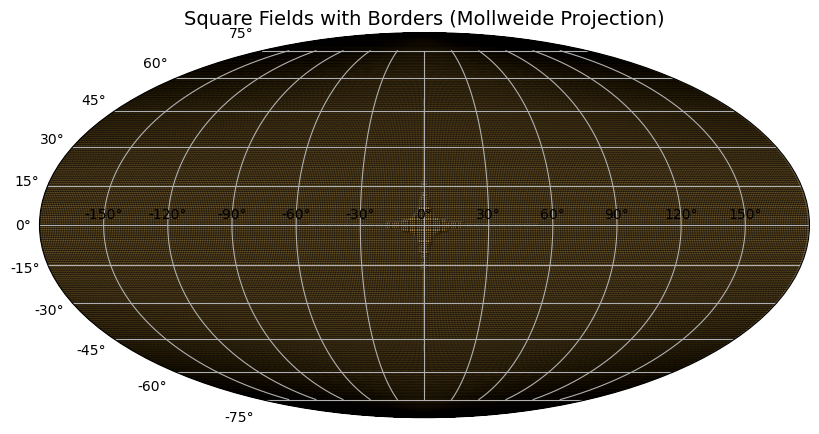

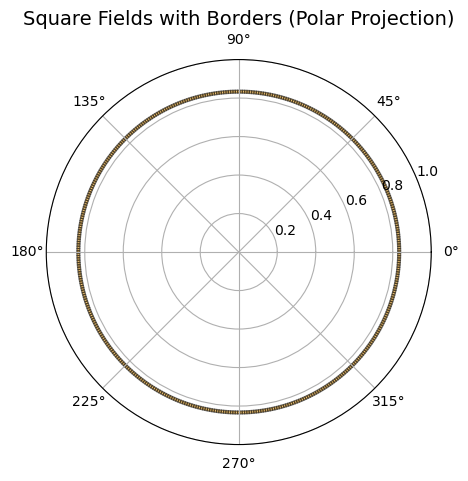

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Rectangle
from matplotlib.collections import PatchCollection

# Fixed parameters
field_radius = 50 / 60  # in degrees (50 arcminutes)
field_side = 50 / 60  # square side in degrees
resolution = field_radius  # Grid resolution in degrees
ra_range = np.arange(0, 360, resolution)  # RA in degrees
dec_range = np.arange(-90, 90, resolution)  # Dec in degrees

# Generate grid of fields
def generate_fields(ra_range, dec_range):
    ra_grid, dec_grid = np.meshgrid(ra_range, dec_range)
    return ra_grid.flatten(), dec_grid.flatten()

ra, dec = generate_fields(ra_range, dec_range)

# Plotting function for circular and square fields with borders
def plot_sky_tiling_with_borders(ra, dec, shape, size, projection, title):
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(111, projection=projection)
    ax.set_title(title, fontsize=14)
    ax.grid(True)

    # Transform coordinates for Mollweide projection
    patches = []
    if projection == "mollweide":
        ra_rad = np.radians(ra - 180)  # Convert RA to radians and shift
        dec_rad = np.radians(dec)  # Convert Dec to radians

        for ra_, dec_ in zip(ra_rad, dec_rad):
            if shape == "circular":
                patches.append(Circle((ra_, dec_), size, edgecolor="black", facecolor="blue", alpha=0.5))
            elif shape == "square":
                patches.append(Rectangle((ra_ - size / 2, dec_ - size / 2), size, size, edgecolor="black", facecolor="orange", alpha=0.5))

    else:  # Polar projection
        theta = np.radians(ra)
        r = 90 - dec

        for theta_, r_ in zip(theta, r):
            if shape == "circular":
                patches.append(Circle((theta_, r_), size, edgecolor="black", facecolor="blue", alpha=0.5))
            elif shape == "square":
                patches.append(Rectangle((theta_ - size / 2, r_ - size / 2), size, size, edgecolor="black", facecolor="orange", alpha=0.5))

    # Add patches to the plot
    patch_collection = PatchCollection(patches, match_original=True)
    ax.add_collection(patch_collection)

    fig.savefig(f'{shape}_{projection}_{title}.png')

# Plot circular fields with borders
plot_sky_tiling_with_borders(ra, dec, "circular", field_radius * np.pi / 180, "mollweide", "Circular Fields with Borders (Mollweide Projection)")
plot_sky_tiling_with_borders(ra, dec, "circular", field_radius * np.pi / 180, "polar", "Circular Fields with Borders (Polar Projection)")

# Plot square fields with borders
plot_sky_tiling_with_borders(ra, dec, "square", field_side * np.pi / 180, "mollweide", "Square Fields with Borders (Mollweide Projection)")
plot_sky_tiling_with_borders(ra, dec, "square", field_side * np.pi / 180, "polar", "Square Fields with Borders (Polar Projection)")

In [20]:
def calculate_number_of_tiles(ra_range, dec_range):
    ra_tiles = len(ra_range)  # Number of RA tiles
    dec_tiles = len(dec_range)  # Number of Dec tiles
    total_tiles = ra_tiles * dec_tiles
    return total_tiles

# Calculate for Mollweide projection (full sky)
mollweide_tiles = calculate_number_of_tiles(ra_range, dec_range)

# Calculate for Polar projection (half sky)
polar_tiles = calculate_number_of_tiles(ra_range, dec_range[:len(dec_range) // 2])  # Only one hemisphere

print(f"Number of square tiles in Mollweide projection: {mollweide_tiles}")
print(f"Number of square tiles in Polar projection (one hemisphere): {polar_tiles}")

Number of square tiles in Mollweide projection: 93312
Number of square tiles in Polar projection (one hemisphere): 46656
